In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [13]:
df = pd.read_csv("framingham.csv")

df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
df.drop(columns=['education'],inplace=True,axis=1)
df.rename(columns={'male':'Sex_male'},inplace=True)

In [15]:
df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [16]:
print(df.TenYearCHD.value_counts())

TenYearCHD
0    3596
1     644
Name: count, dtype: int64


In [18]:
from sklearn.model_selection import train_test_split

df.dropna(axis=0, inplace=True)


x=np.asarray(df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose']])
y=np.asarray(df['TenYearCHD'])

x= preprocessing.StandardScaler().fit(x).transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)


print('train set: ',x_train.shape,y_train.shape)
print('test set: ',x_test.shape,y_test.shape)



train set:  (2625, 6) (2625,)
test set:  (1126, 6) (1126,)


C:\Users\durga\AppData\Local\Temp\ipykernel_29780\4186660616.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD',data=df,palette='Set1')


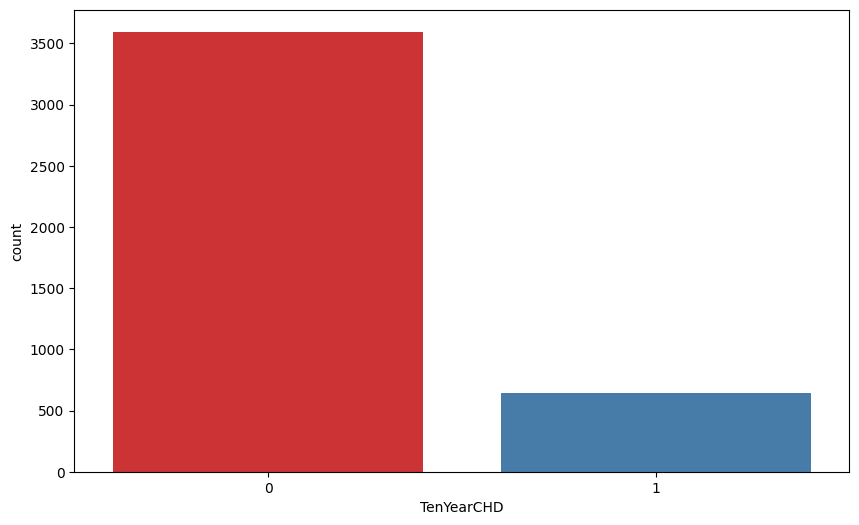

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='TenYearCHD',data=df,palette='Set1')
plt.show()

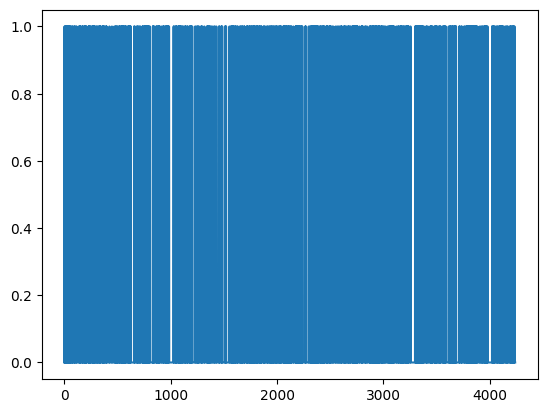

In [ ]:
laste =df['TenYearCHD'].plot()
plt.show(laste)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)

print('Accuracy score: ',accuracy_score(y_test,y_pred))

Accuracy scor:  0.8490230905861457


The details for confusion matrix is: 

               precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



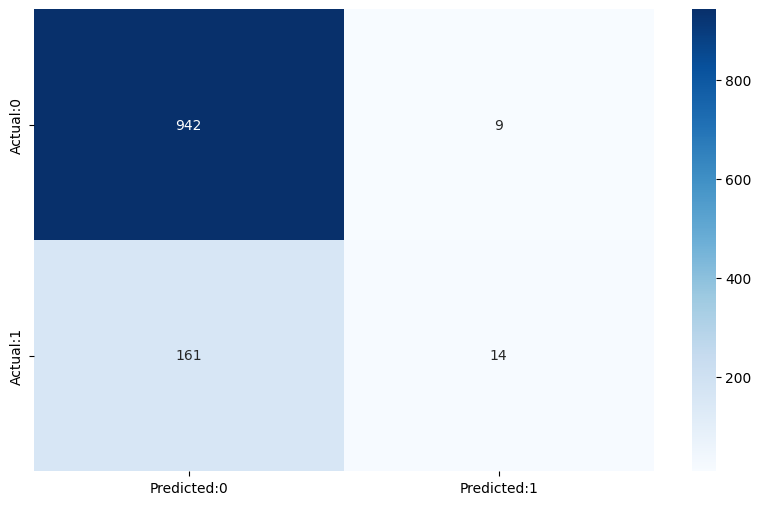

In [23]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report

print('The details for confusion matrix is: \n\n',classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

conf_mat = pd.DataFrame(data=cm,
                        columns=['Predicted:0','Predicted:1'],
                        index=['Actual:0','Actual:1'])
plt.figure(figsize=(10,6))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.show()